In [ ]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv('All_Tweets_Transformed-Final.csv')
# Assuming df is your DataFrame with the 'Engagement Score' column
# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define a z-score threshold (e.g., 3 for a standard threshold)
z_threshold = 3

# Calculate the z-scores for the 'Engagement Score' column
df_regression['Engagement Score Z-Score'] = zscore(df_regression['Engagement Score'])

# Filter out rows where the absolute z-score is greater than the threshold
df_filtered = df_regression[abs(df_regression['Engagement Score Z-Score']) <= z_threshold]

# Drop the z-score column if you don't need it anymore
df_filtered = df_filtered.drop(columns=['Engagement Score Z-Score'])

# Now, df_filtered contains data without outliers in the 'Engagement Score' column


Best Random Forest Model: RandomForestRegressor(max_depth=20, n_estimators=200)
Best Random Forest Regression Mean Squared Error: 3.0287295966310115
Best Random Forest Regression R-squared: 0.16213266438267893


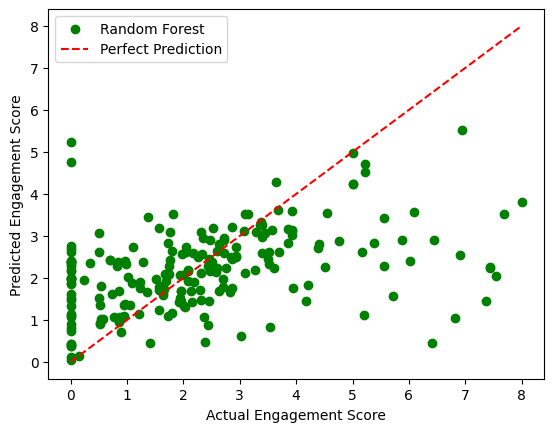

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = df_filtered

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Model: {best_model_rf}")

# Evaluate the best model on the test set
y_pred_best_rf = best_model_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Regression Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest Regression R-squared: {r2_best_rf}")

# Plotting the results
plt.scatter(y_test, y_pred_best_rf, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = df_filtered

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest with Polynomial Features
param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Add Polynomial Features to the RandomForestRegressor
best_model_rf = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestRegressor()
)

grid_search_rf = GridSearchCV(best_model_rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Model with Polynomial Features: {best_model_rf}")

# Evaluate the best model on the test set
y_pred_best_rf = best_model_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Regression Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest Regression R-squared: {r2_best_rf}")


Best Random Forest Model with Polynomial Features: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, min_samples_split=5))])
Best Random Forest Regression Mean Squared Error: 2.887889951795495
Best Random Forest Regression R-squared: 0.20109452419970797


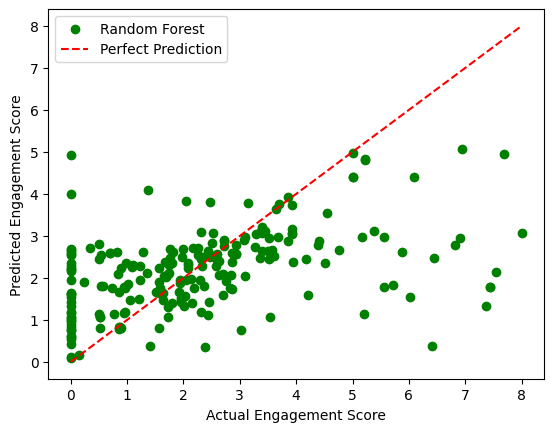

In [ ]:
# Plotting the results
plt.scatter(y_test, y_pred_best_rf, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.legend()
plt.show()

<ipython-input-43-a20dd449e630>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Topic'] = label_encoder.fit_transform(df_cluster['Topic'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

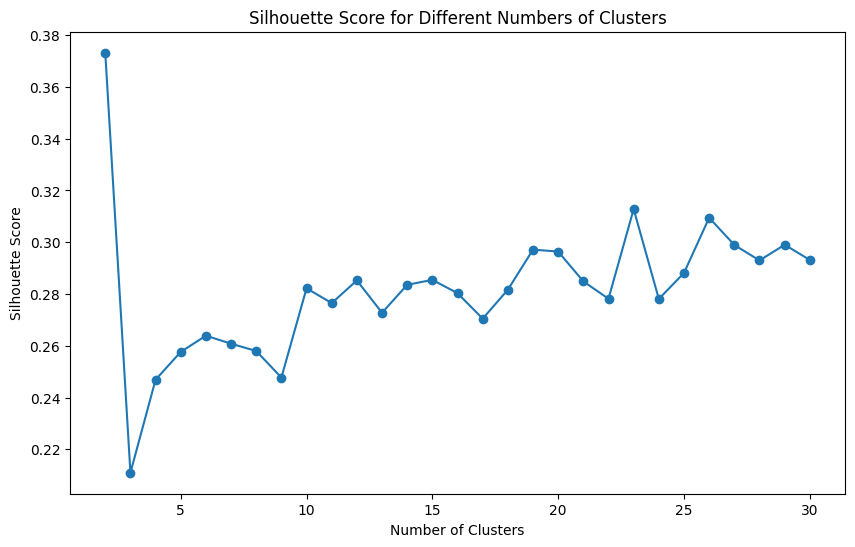

Optimal Number of Clusters: 2


"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Scatter plot for two features, colored by cluster\ndef plot_cluster_scatter(feature1, feature2):\n    plt.figure(figsize=(8, 6))\n    sns.scatterplot(data=df_cluster, x=feature1, y=feature2, hue='Cluster', palette='viridis', legend='full', alpha=0.7)\n    plt.title(f'{feature1} vs. {feature2} - Colored by Cluster')\n    plt.xlabel(feature1)\n    plt.ylabel(feature2)\n    plt.legend()\n    plt.show()\n\n# Replace 'Feature1' and 'Feature2' with the features you want to plot\nplot_cluster_scatter('Word Count', 'Engagement Score')"

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = df_filtered

# Drop rows with NaN values
df_cluster = df.dropna()

# Define features for clustering
features_for_clustering = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness']

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_cluster['Topic'] = label_encoder.fit_transform(df_cluster['Topic'])

# Extract features
X_cluster = df_cluster[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Assuming X contains your feature matrix

# Define the range of clusters you want to try
min_clusters = 2
max_clusters = 30

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_cluster_scaled)

    # Get cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_cluster_scaled, labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print(f"Optimal Number of Clusters: {optimal_clusters}")

'''import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for two features, colored by cluster
def plot_cluster_scatter(feature1, feature2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cluster, x=feature1, y=feature2, hue='Cluster', palette='viridis', legend='full', alpha=0.7)
    plt.title(f'{feature1} vs. {feature2} - Colored by Cluster')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

# Replace 'Feature1' and 'Feature2' with the features you want to plot
plot_cluster_scatter('Word Count', 'Engagement Score')'''


<ipython-input-46-6407224d235d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Topic'] = label_encoder.fit_transform(df_cluster['Topic'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-46-6407224d235d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.labels_


0    907
1     84
Name: Cluster, dtype: int64
Cluster Centers:
   Image Type     Topic  Text Sentiment  Word Count  Number of Hashtags  \
0    0.288864  3.500551    1.234840e-01   13.252481            8.751929   
1    0.916667  0.476190    1.387779e-17    2.761905           34.273810   

   Quality of Image  Relevant Image  Face Presence  Colorfulness  
0          0.824697        0.803749       0.248071      9.374120  
1         -0.809524       -0.880952      -0.857143     17.616214  
Silhouette Score: 0.37318436536229105
Calinski-Harabasz Index: 243.4316015096786
Davies-Bouldin Index: 0.8798547589530985


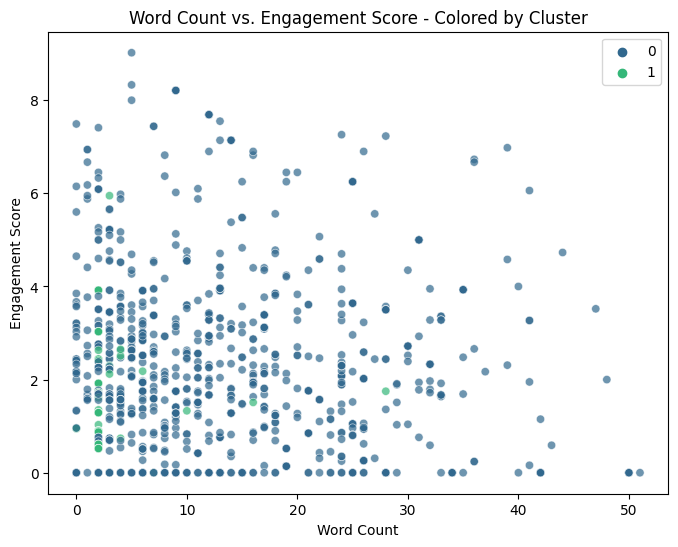

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = df_filtered

# Drop rows with NaN values
df_cluster = df.dropna()

# Define features for clustering
features_for_clustering = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness']

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_cluster['Topic'] = label_encoder.fit_transform(df_cluster['Topic'])

# Extract features
X_cluster = df_cluster[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Specify the number of clusters (you need to choose this based on your problem)
n_clusters = 2

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X_cluster_scaled)

# Add cluster labels to your original dataframe
df_cluster['Cluster'] = kmeans.labels_

# Print the count of data points in each cluster
print(df_cluster['Cluster'].value_counts())

# You can further analyze the characteristics of each cluster by inspecting the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features_for_clustering)
print("Cluster Centers:")
print(cluster_centers_df)

# Get cluster labels
labels = kmeans.labels_

# Evaluate clustering
silhouette_avg = silhouette_score(X_cluster_scaled, labels)
calinski_harabasz_score_val = calinski_harabasz_score(X_cluster_scaled, labels)
davies_bouldin_score_val = davies_bouldin_score(X_cluster_scaled, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score_val}")
print(f"Davies-Bouldin Index: {davies_bouldin_score_val}")

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for two features, colored by cluster
def plot_cluster_scatter(feature1, feature2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cluster, x=feature1, y=feature2, hue='Cluster', palette='viridis', legend='full', alpha=0.7)
    plt.title(f'{feature1} vs. {feature2} - Colored by Cluster')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

# Replace 'Feature1' and 'Feature2' with the features you want to plot
plot_cluster_scatter('Word Count', 'Engagement Score')
